# Эксперименты

In [178]:
# импортируем библиотеки
import math
import numpy as np
import scipy.integrate as integrate   # для решения ОДУ в методе DEM
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# выставляем размер шрифта подписей осей ко всем графикам
matplotlib.rc('xtick', labelsize = 13) 
matplotlib.rc('ytick', labelsize = 13) 

turquoise = '#40E0D0'

In [72]:
# импортируем из другие Jupyter Notebook-и
%run ./FP_formulas.ipynb
%run ./quarz_well_v2.ipynb

# Допустимая невязка

In [75]:
#al_error_005 = []   # массив, содержащий решение обратной задачи (por, aspect, time) с параметром allowable_error = 0.05
#al_error_01 = []
#al_error_015 = []
#al_error_02 = []
#al_error_03 = []
#al_error_05 = []

In [77]:
for _ in range(2):
    allowable_error = 0.05
    al_error_005.append(do_inverse_problem(true_well_vp, true_well_vs, true_well_rho, sample_number, allowable_error, 
                        por_loc, por_scale, aspect_loc, aspect_scale))
    
    allowable_error = 0.1
    al_error_01.append(do_inverse_problem(true_well_vp, true_well_vs, true_well_rho, sample_number, allowable_error, 
                        por_loc, por_scale, aspect_loc, aspect_scale))
    
    allowable_error = 0.15
    al_error_015.append(do_inverse_problem(true_well_vp, true_well_vs, true_well_rho, sample_number, allowable_error, 
                        por_loc, por_scale, aspect_loc, aspect_scale))
    
    allowable_error = 0.2
    al_error_02.append(do_inverse_problem(true_well_vp, true_well_vs, true_well_rho, sample_number, allowable_error, 
                        por_loc, por_scale, aspect_loc, aspect_scale))
    
    allowable_error = 0.3
    al_error_03.append(do_inverse_problem(true_well_vp, true_well_vs, true_well_rho, sample_number, allowable_error, 
                        por_loc, por_scale, aspect_loc, aspect_scale))
    
    allowable_error = 0.5
    al_error_05.append(do_inverse_problem(true_well_vp, true_well_vs, true_well_rho, sample_number, allowable_error, 
                        por_loc, por_scale, aspect_loc, aspect_scale))

In [206]:
# расчет невязки между исходными и инвертированными значениями пористости
def get_loss(ideal_list, non_ideal_list):
    #ideal = np.array(ideal_list)
    non_ideal = np.array(non_ideal_list)
    
    return np.sum((ideal_list - non_ideal)**2)/len(ideal_list)

In [82]:
al_error_005_loss = []
al_error_01_loss = []
al_error_015_loss = []
al_error_02_loss = []
al_error_03_loss = []
al_error_05_loss = []

for i in range(len(al_error_005)):
    al_error_005_loss.append(get_loss(porosity_list, al_error_005[i][0]))
    al_error_01_loss.append(get_loss(porosity_list, al_error_01[i][0]))
    al_error_015_loss.append(get_loss(porosity_list, al_error_015[i][0]))
    al_error_02_loss.append(get_loss(porosity_list, al_error_02[i][0]))
    al_error_03_loss.append(get_loss(porosity_list, al_error_03[i][0]))
    al_error_05_loss.append(get_loss(porosity_list, al_error_05[i][0]))

In [109]:
al_error_005_time = []
al_error_01_time = []
al_error_015_time = []
al_error_02_time = []
al_error_03_time = []
al_error_05_time = []

for i in range(len(al_error_005)):
    al_error_005_time.append(al_error_005[i][2])
    al_error_01_time.append(al_error_01[i][2])
    al_error_015_time.append(al_error_015[i][2])
    al_error_02_time.append(al_error_02[i][2])
    al_error_03_time.append(al_error_03[i][2])
    al_error_05_time.append(al_error_05[i][2])

In [111]:
al_error_ALL = [al_error_005, al_error_005, al_error_015, al_error_02, al_error_03, al_error_05]
al_error_loss_ALL = [al_error_005_loss, al_error_005_loss, al_error_015_loss, 
                     al_error_02_loss, al_error_03_loss, al_error_05_loss]
al_error_time_ALL = [al_error_005_time, al_error_01_time, al_error_015_time, 
                     al_error_02_time, al_error_03_time, al_error_05_time]

In [233]:
al_error_average_time = []
al_error_median_loss = []
al_error_median_loss_not_rounded = []

for i in range(len(al_error_time_ALL)):
    al_error_average_time.append(str(round(sum(al_error_time_ALL[i])/len(al_error_time_ALL[i]), 2)))
    
    al_error_loss = np.array(al_error_loss_ALL)
    al_error_median_loss.append(str(round(np.median(al_error_loss_ALL[i]), 2)))
    al_error_median_loss_not_rounded.append(np.median(al_error_loss_ALL[i]))

In [234]:
def draw_al_error_loss_bar_plot(al_error_ALL, al_error_loss_ALL, al_error_average_time, al_error_median_loss):
    
    turquoise = '#40E0D0'
    dark_violet = '#9932CC'
    violet = '#EE82EE'
    spring_green = '#00FF7F'
        
    fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (9, 25)) # create matplotlib figure
    
    for i in range(len(al_error_ALL)):

        #ax = fig.add_subplot(111) # create matplotlib axes
        axes2 = axes[i].twinx() # create another axes that shares the same x-axis as ax

        width = 0.35
        axes[i].bar(np.arange(len(al_error_loss_ALL[0])), al_error_loss_ALL[i], width = width, color = turquoise)
        axes2.bar(np.arange(len(al_error_loss_ALL[0])) + width, al_error_time_ALL[i], width = width, color = violet)
        
        axes[i].yaxis.label.set_color(turquoise)
        axes2.yaxis.label.set_color(violet)
        
        axes[i].set_ylabel("Loss", fontsize = 16, color = turquoise, fontweight = 'bold')
        axes2.set_ylabel("Time (s)", fontsize = 16, color = violet, fontweight = 'bold')
        
    axes[0].set_title('невязка 0.05, среднее время {} (с), медиана {}'.format(al_error_average_time[0],
                      al_error_median_loss[0]), fontsize = 14)
    axes[1].set_title('невязка 0.1, среднее время {} (с), медиана {}'.format(al_error_average_time[1],
                      al_error_median_loss[1]), fontsize = 14)
    axes[2].set_title('невязка 0.15, среднее время {} (с), медиана {}'.format(al_error_average_time[2],
                      al_error_median_loss[2]), fontsize = 14)
    axes[3].set_title('невязка 0.2, среднее время {} (с), медиана {}'.format(al_error_average_time[3],
                      al_error_median_loss[3]), fontsize = 14)
    axes[4].set_title('невязка 0.3, среднее время {} (с), медиана {}'.format(al_error_average_time[4],
                      al_error_median_loss[4]), fontsize = 14)
    axes[5].set_title('невязка 0.5, среднее время {} (с), медиана {}'.format(al_error_average_time[5],
                      al_error_median_loss[5]), fontsize = 14)

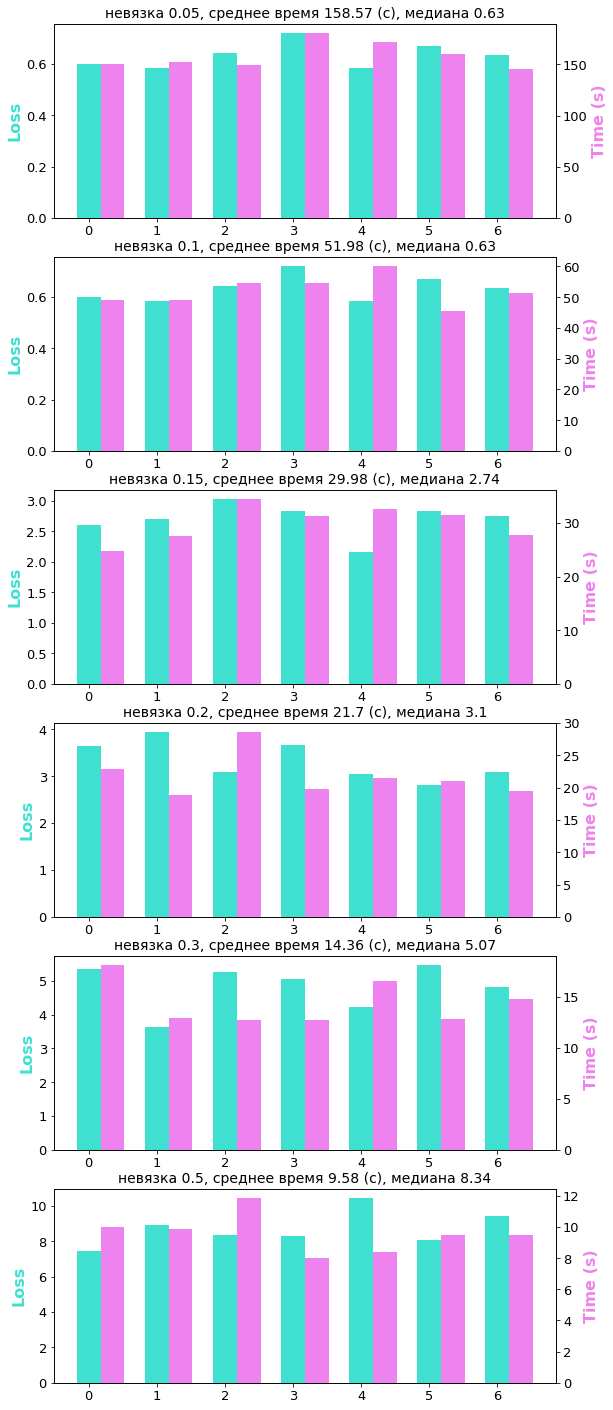

In [235]:
draw_al_error_loss_bar_plot(al_error_ALL, al_error_loss_ALL, al_error_average_time, al_error_median_loss)

In [239]:
# из всей выборки выберем массивы пористости, по которым будем строить графики
al_error_por_for_plot = []

for i in range(len(al_error_median_loss_not_rounded)):
    index = al_error_loss_ALL[i].index(al_error_median_loss_not_rounded[i])
    al_error_por_for_plot.append(al_error_ALL[i][index])

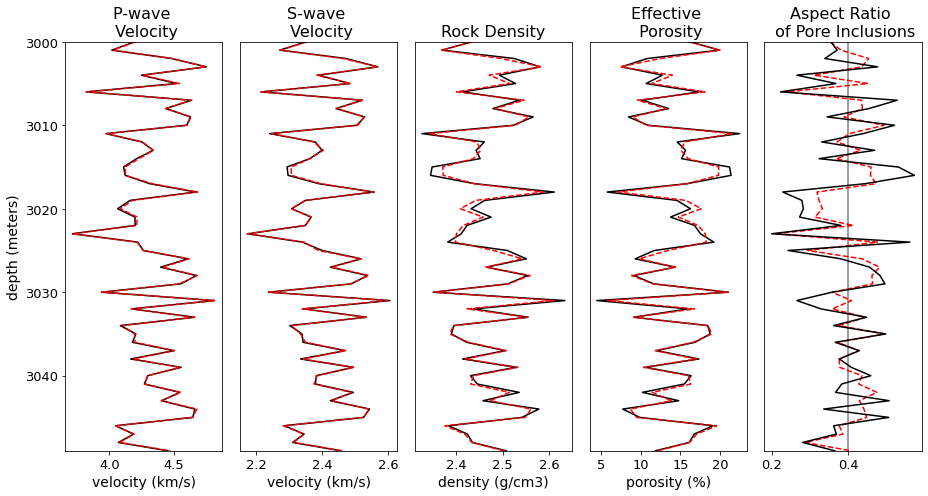

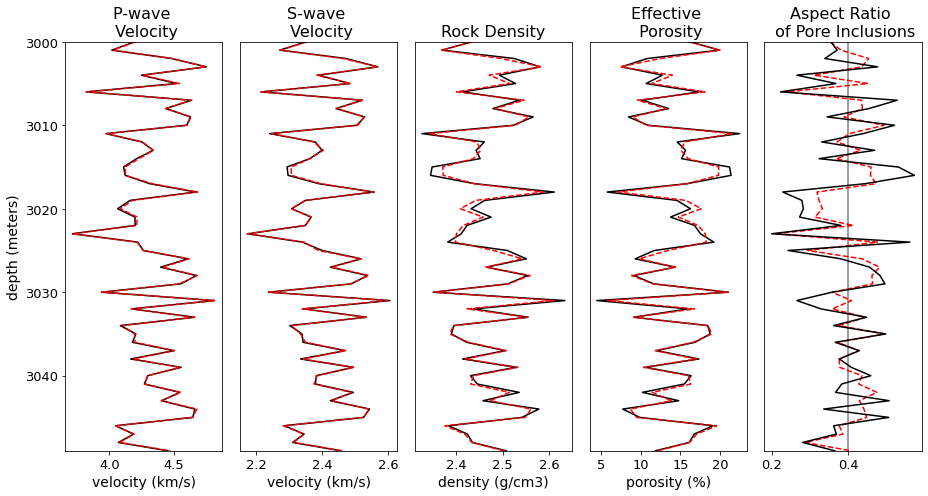

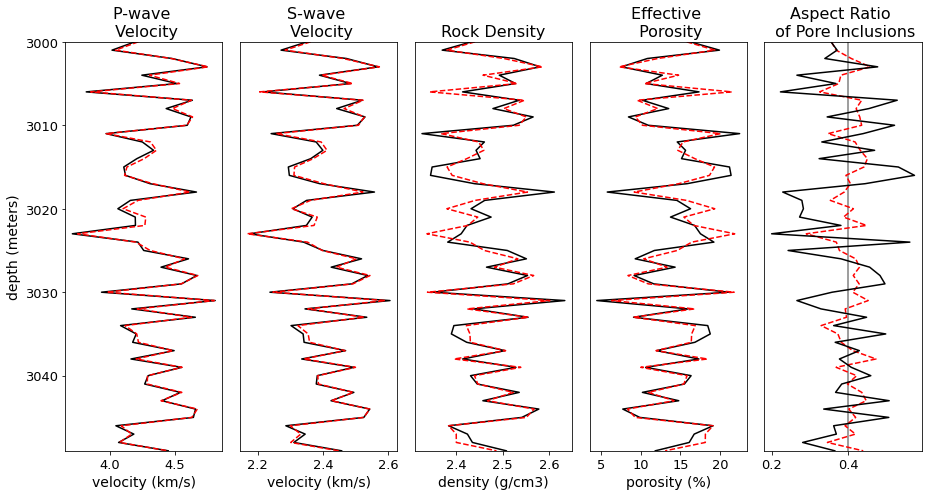

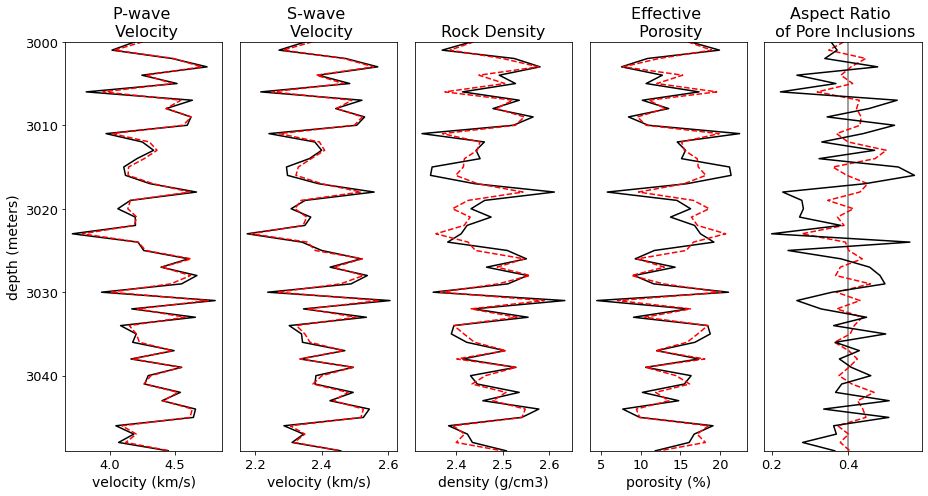

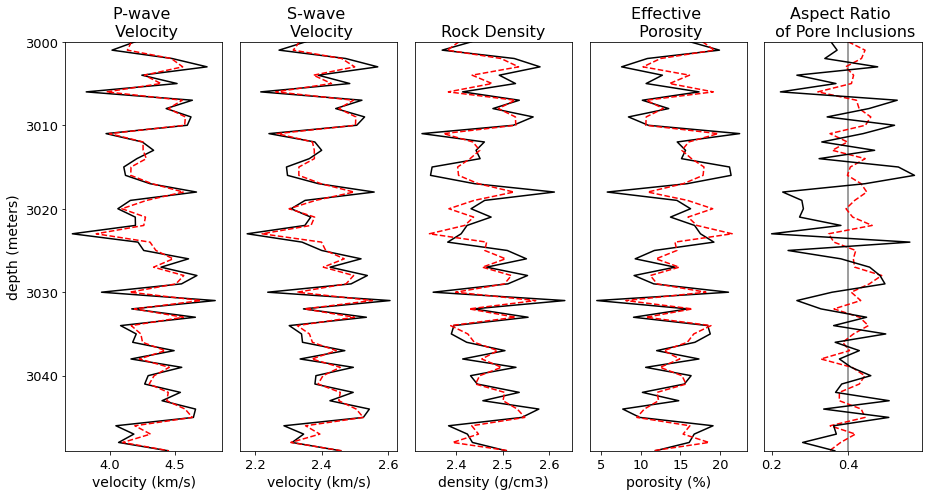

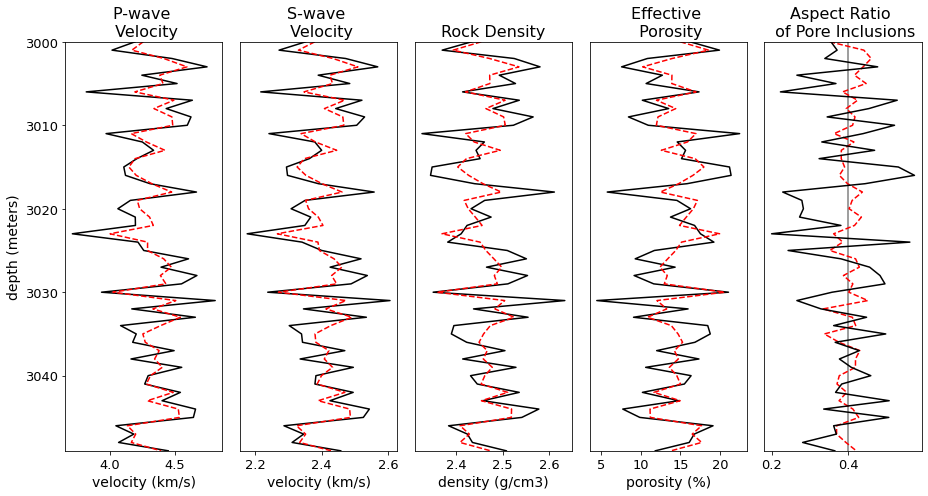

In [243]:
for i in range(len(al_error_por_for_plot)):
    
    inverse_vp_list, inverse_vs_list, inverse_rho_list = get_velocities_in_well(al_error_por_for_plot[i][0], al_error_por_for_plot[i][1])
    
    draw_IP(depth, true_well_vp, true_well_vs, true_well_rho, quarz_list, porosity_list, aspect_ratio_list, true_asp_loc,
            al_error_por_for_plot[i][0], al_error_por_for_plot[i][1], inverse_vp_list, inverse_vs_list, inverse_rho_list)